In [ ]:
from charts.GanttChart import GanttChart

In [ ]:
CSV_ROUTE = "../../output/stackoverflow/stackoverflow.csv"
chartCreator = GanttChart(CSV_ROUTE)
chartCreator.showCharts()

In [1]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('seaborn')

In [2]:
rpd = pd.read_csv("../../output/reddit/reddit.csv")
rpdOK = pd.read_csv("../../output/reddit/reddit_livevars.csv")
rpdOUT = pd.read_csv("../../output/reddit/reddit_outliers.csv")

In [3]:
rpd.head()

,entityName,variationId,count,firstTimestamp,lastTimestamp
0,Authors,1,3054618,1118030400,1388534391
1,Authors,2,16074611,1119240000,1388534397
2,Comments,1,2143098,1134365188,1193875194
3,Comments,2,1973,1139134174,1193862797
4,Comments,3,355,1140392732,1193874097


In [4]:
import datetime
for i in (rpd,rpdOK,rpdOUT):
    i.firstTimestamp = i.firstTimestamp.apply(lambda t : datetime.datetime.fromtimestamp(t).date())
    i.lastTimestamp = i.lastTimestamp.apply(lambda t : datetime.datetime.fromtimestamp(t).date())
    i.variationId = i.variationId.astype('int32')

In [5]:
rpd.head()

,entityName,variationId,count,firstTimestamp,lastTimestamp
0,Authors,1,3054618,2005-06-06,2013-12-31
1,Authors,2,16074611,2005-06-20,2013-12-31
2,Comments,1,2143098,2005-12-12,2007-10-31
3,Comments,2,1973,2006-02-05,2007-10-31
4,Comments,3,355,2006-02-19,2007-10-31


In [6]:
def calc_date_range(df):
    return pd.date_range(df.firstTimestamp,df.lastTimestamp)

rpd["timespan"] = rpd.apply(calc_date_range,axis=1)

In [7]:
rpd.groupby(by=["entityName","variationId"])

timespanIndex = pd.date_range(rpd.firstTimestamp.min(),rpd.lastTimestamp.max())

In [8]:
timespanIndex

DatetimeIndex(['2005-06-06', '2005-06-07', '2005-06-08', '2005-06-09',
               '2005-06-10', '2005-06-11', '2005-06-12', '2005-06-13',
               '2005-06-14', '2005-06-15',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', length=3131, freq='D')

In [34]:
opd = pd.concat(
    [pd.Series(i, q) for i,q in rpd[rpd.entityName == "Comments"]['timespan'].iteritems()],
#    [pd.Series(1,
#                           pd.date_range(rpd.firstTimestamp.min(),rpd.lastTimestamp.max()),
#                           name="Comments_1"
#                          )],
    axis=1)
#opd.set_index(timespanIndex)
opd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2005-12-12,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-13,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-14,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-15,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-16,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


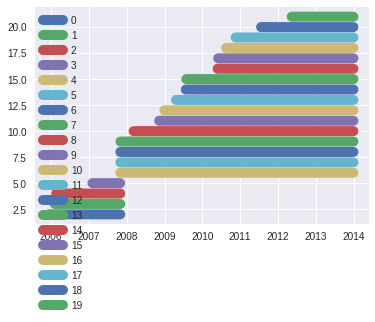

In [35]:
opd.plot(lw=10)

In [31]:
list(rpd[rpd.entityName == "Comments"]['timespan'].iteritems())

[(2, DatetimeIndex(['2005-12-12', '2005-12-13', '2005-12-14', '2005-12-15',
                 '2005-12-16', '2005-12-17', '2005-12-18', '2005-12-19',
                 '2005-12-20', '2005-12-21',
                 ...
                 '2007-10-22', '2007-10-23', '2007-10-24', '2007-10-25',
                 '2007-10-26', '2007-10-27', '2007-10-28', '2007-10-29',
                 '2007-10-30', '2007-10-31'],
                dtype='datetime64[ns]', length=689, freq='D')),
 (3, DatetimeIndex(['2006-02-05', '2006-02-06', '2006-02-07', '2006-02-08',
                 '2006-02-09', '2006-02-10', '2006-02-11', '2006-02-12',
                 '2006-02-13', '2006-02-14',
                 ...
                 '2007-10-22', '2007-10-23', '2007-10-24', '2007-10-25',
                 '2007-10-26', '2007-10-27', '2007-10-28', '2007-10-29',
                 '2007-10-30', '2007-10-31'],
                dtype='datetime64[ns]', length=634, freq='D')),
 (4, DatetimeIndex(['2006-02-19', '2006-02-20', '2006-02-2

In [56]:
rpd.set_index(timespanIndex)

ValueError: Length mismatch: Expected axis has 1334 elements, new values have 3131 elements